In [1]:
%matplotlib inline

In [17]:
OUTPUT_PATH = './test/'

In [225]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

from blurnet.utils import dataloader, GaussianBlurAll

In [3]:
def imshow(img, title='',filename='', scale=True):
    img = img / 2 + 0.5     # unnormalize
    if type(img) == torch.Tensor:
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
    else:  # if type(img) == numpy.ndarray
        plt.imshow(img)
    if not scale:
        plt.xticks([])  # if you want to remove scale axes
        plt.yticks([])
    if title:
        plt.title(title)
    if filename:
        plt.savefig(filename)  # added for saving the image
    plt.show()

In [5]:
trainloader, testloader, classes = dataloader(32)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

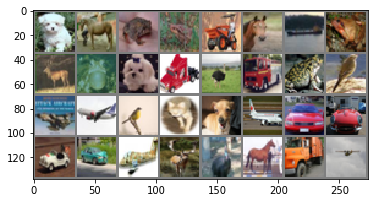

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))

In [8]:
images.size()

torch.Size([32, 3, 32, 32])

In [65]:
img = images[0].numpy().transpose(1, 2, 0)

In [66]:
img.shape

(32, 32, 3)

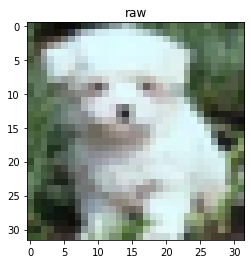

In [123]:
imshow(img, title='raw', filename=OUTPUT_PATH + 'raw.png')

# highpass filter
https://qiita.com/hitomatagi/items/93e01ef22e46b14a60a9

In [69]:
# ハイパス フィルタ
kernel_highpass = np.array([
                            [-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]
                            ], np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


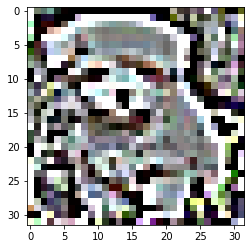

In [70]:
# color
img_highpass = cv2.filter2D(img, -1, kernel_highpass)
imshow(img_highpass)

In [71]:
img_highpass.shape

(32, 32, 3)

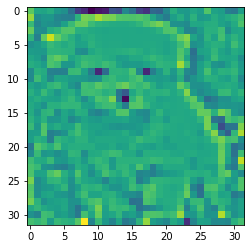

In [72]:
# grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_highpass = cv2.filter2D(img_gray, -1, kernel_highpass)
imshow(img_gray_highpass)

In [73]:
img_gray_highpass.shape

(32, 32)

# img - img_blur

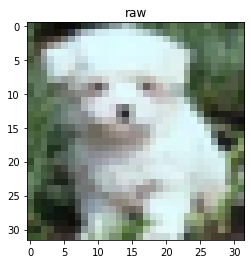

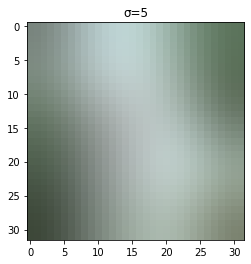

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


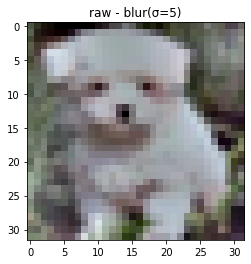

In [295]:
sigma = 5
# radius = sigma * 3
# kernel_size = (radius * 2 + 1, radius * 2 + 1)

img_blur = cv2.GaussianBlur(img, (0,0), sigma)
# img_diff = img_blur - img
img_diff = img - img_blur
imshow(img, title='raw')
imshow(img_blur, title='σ={}'.format(sigma), 
       filename=OUTPUT_PATH + 'blur_s{}.png'.format(sigma))
imshow(img_diff, title='raw - blur(σ={})'.format(sigma), 
       filename=OUTPUT_PATH + 'diff_s{}.png'.format(sigma))

In [174]:
img.shape

(32, 32, 3)

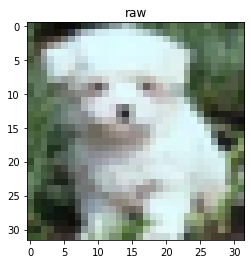

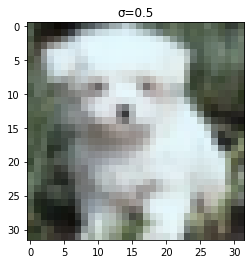

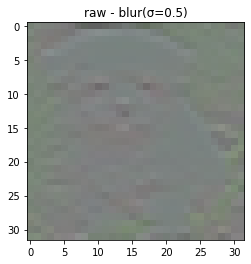

In [179]:
sigma = 0.5
# radius = sigma * 3
# kernel_size = (radius * 2 + 1, radius * 2 + 1)

img_blur = cv2.GaussianBlur(img.transpose(2, 0, 1), (0,0), sigma)
# img_diff = img_blur - img
img_diff = img.transpose(2, 0, 1) - img_blur
imshow(img, title='raw')
imshow(img_blur.transpose(1, 2, 0), title='σ={}'.format(sigma), 
       filename=OUTPUT_PATH + 'blur_s{}.png'.format(sigma))
imshow(img_diff.transpose(1, 2, 0), title='raw - blur(σ={})'.format(sigma), 
       filename=OUTPUT_PATH + 'diff_s{}.png'.format(sigma))

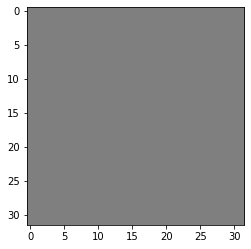

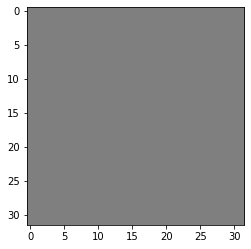

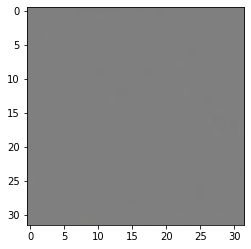

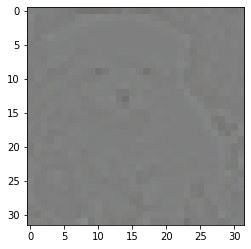

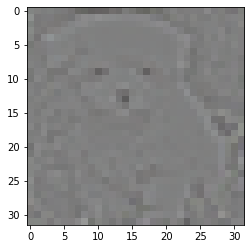

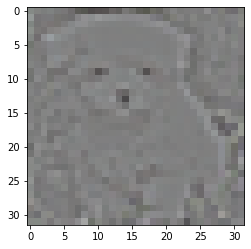

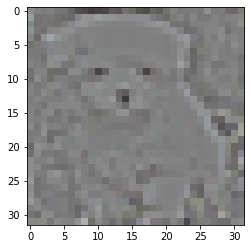

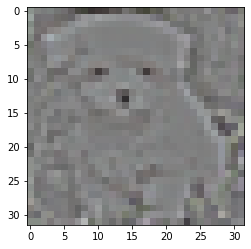

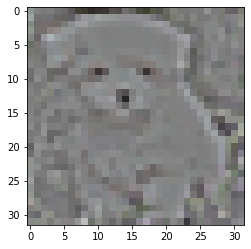

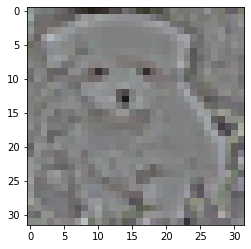

In [132]:
for i in range(1, 11):
    sigma = i * 0.1
    img_blur = cv2.GaussianBlur(img, (0,0), sigma)
    img_diff = img - img_blur
    imshow(img_diff)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


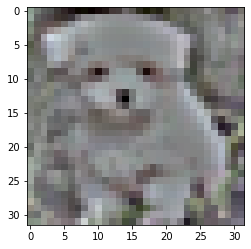

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


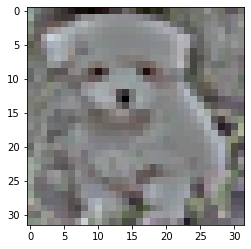

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


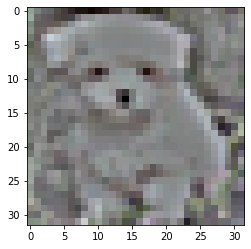

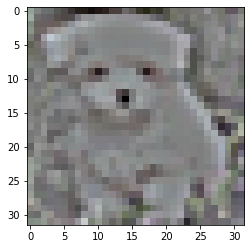

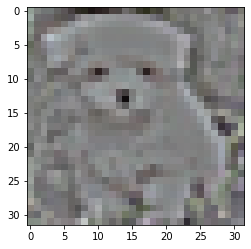

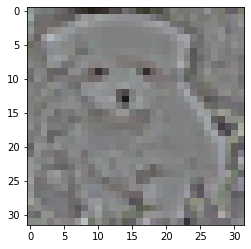

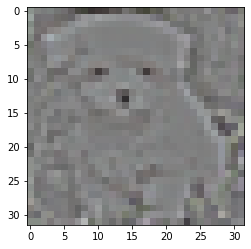

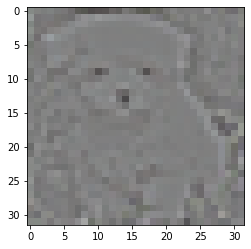

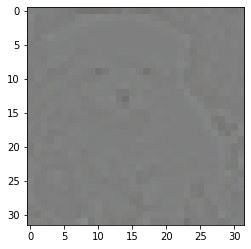

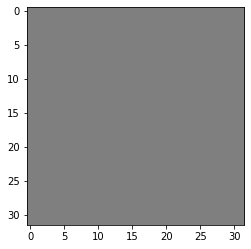

In [138]:
for i in range(20, 0, -2):
    sigma = i * 0.1
    img_blur = cv2.GaussianBlur(img, (0,0), sigma)
    img_diff = img - img_blur
    imshow(img_diff)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


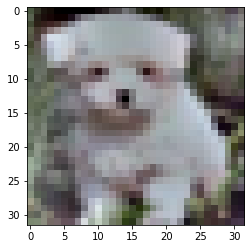

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


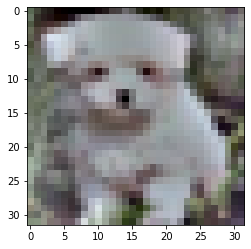

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


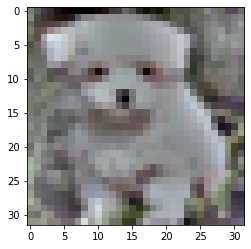

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


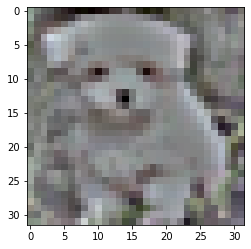

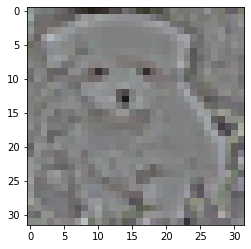

In [290]:
for i in range(5, 0, -1):
    sigma = i 
    img_blur = cv2.GaussianBlur(img, (0,0), sigma)
    img_diff = img - img_blur
    imshow(img_diff)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


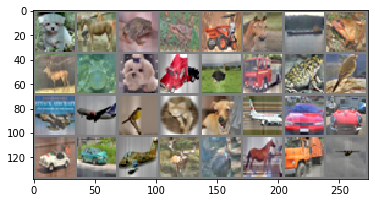

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


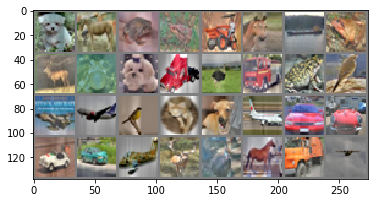

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


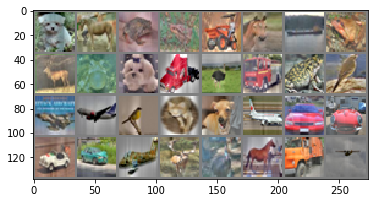

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


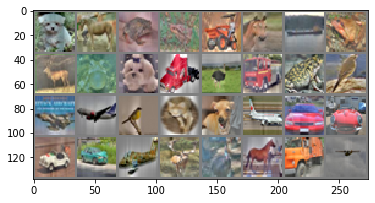

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


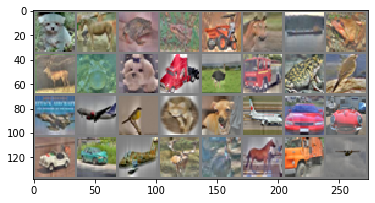

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


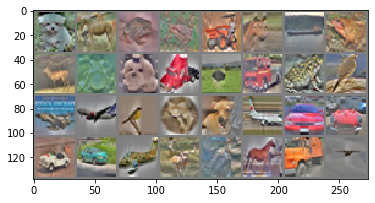

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


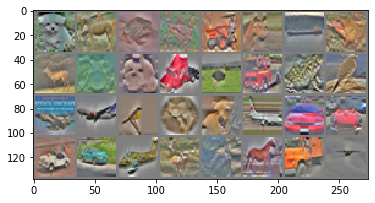

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


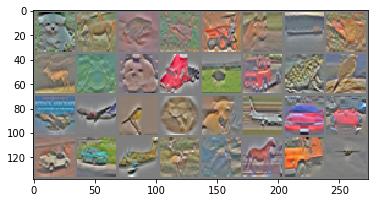

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


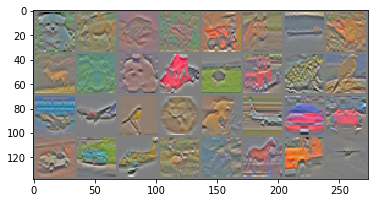

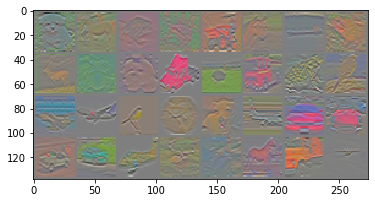

In [288]:
for i in range(10, 0, -1):
    sigma = i 
    imgs_diff = hypass_all(images, sigma)
    imshow(torchvision.utils.make_grid(imgs_diff))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


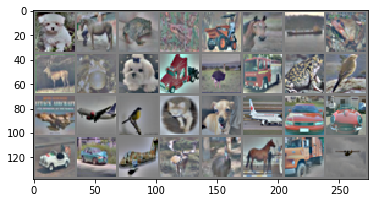

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


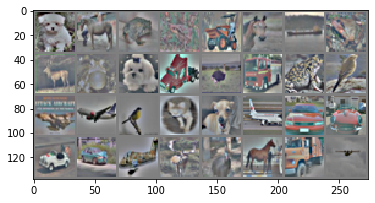

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


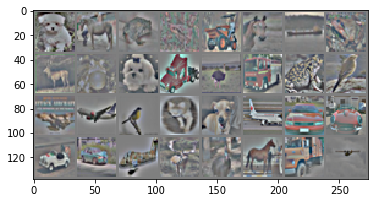

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


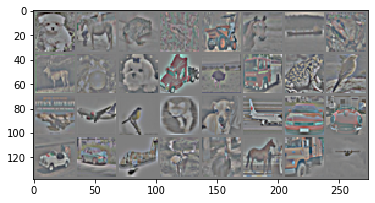

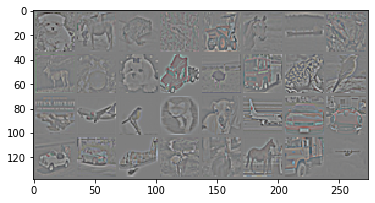

In [291]:
for i in range(5, 0, -1):
    sigma = i 
    imgs_diff = images - GaussianBlurAll(images, (0,0), sigma)
    imshow(torchvision.utils.make_grid(imgs_diff))

In [ ]:
for i in range(10, 0, -2):
    sigma = i * 0.1
    img_blur = cv2.GaussianBlur(img, (0,0), sigma)
    img_diff = img - img_blur
    imshow(img_diff)

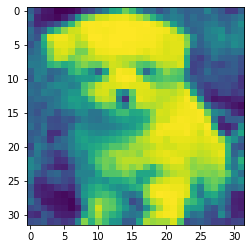

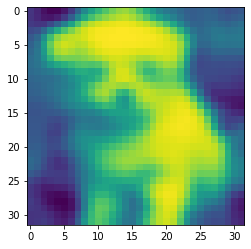

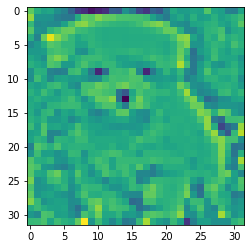

In [130]:
sigma = 1
radius = sigma * 3
kernel_size = (radius * 2 + 1, radius * 2 + 1)
img_gray_blur = cv2.GaussianBlur(img_gray, (0,0), sigma)
# img_diff = img_blur - img
img_gray_diff = img_gray - img_gray_blur
imshow(img_gray)
imshow(img_gray_blur)
imshow(img_gray_diff)

In [ ]:
sigma = 0.5
# radius = sigma * 3
# kernel_size = (radius * 2 + 1, radius * 2 + 1)


# make function

In [162]:
def hypass_all(imgs, sigma):
    """
    take a difference between raw and blur images
    
    input: Torch.Tensor
    output: Torch.Tensor 
    """
    imgs = imgs.numpy()
    imgs_list = []
    for img in imgs:
        img_blur = cv2.GaussianBlur(img, (0,0), sigma)
        # print(img_blur.shape)
        imgs_list.append(img - img_blur)
    imgs_list = np.array(imgs_list)
    imgs_list = imgs_list
    return  torch.from_numpy(imgs_list)

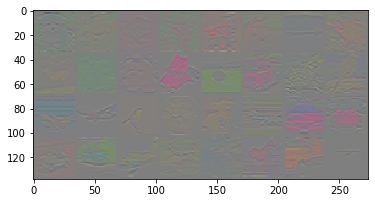

In [279]:
imgs_diff = hypass_all(images, sigma=0.5)
imshow(torchvision.utils.make_grid(imgs_diff))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


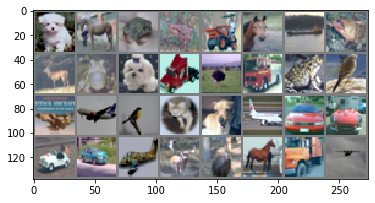

In [285]:
imgs_diff = images - GaussianBlurAll(images, (0,0), sigma=100)
imshow(torchvision.utils.make_grid(imgs_diff))

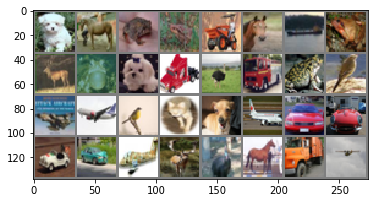

In [262]:
imshow(torchvision.utils.make_grid(images))